# Q Learning 
## Control of water level in tank using q learning

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Pond simulation model

In [2]:
class pond:
    def __init__(self,area,max_height,inital_height=0.0):
        self.area = area
        self.initial_height = inital_height
        self.volume = area*inital_height
        self.max_height = max_height
        self.max_volume = area*max_height
        self.overflow = 0
        self.height = float(self.volume)/float(self.area)

    def timestep(self,dt):
        self.timestep=dt

    def qout(self,percent_opening):
        if percent_opening >=0 and percent_opening <= 1:
            return np.sqrt(2*9.81*self.volume/self.area)*percent_opening
        else:
            raise ValueError('A very specific bad thing happened with the gate opening, its not in 1 to 0')

    def volume_update(self,h):
        self.volume = self.volume + h*self.area
        self.height = float(self.volume)/float(self.area)
        if self.volume < 0:
            self.volume = 0
        if self.volume > self.max_volume:
            self.overflow = 1
            self.volume = self.max_volume
        else:
            self.overflow = 0

    def dhdt(self,qin,qout):
        h = float(qin-qout) * 1/float(self.area) * float(self.timestep)
        self.volume_update(h)

def reward12(height):
    if height >= 1.0 and height <= 1.2:
        return 1.0
    else:
        return -1.0


def state2reality(pond_class, Q_matrix):
    """Discrete Ponds"""
    height_discrete_value = Q_matrix.shape
    index_discrete = pond_class.max_height/(height_discrete_value[0]-1)
    height = pond_class.height/index_discrete
    height = int(np.floor(height))
    return height


# Action function

def epsi_greedy(matrix, epsi, state_system):
    """Action Choice Based on Greedy Search"""
    epsilon = epsi
    if np.random.rand() < epsilon:
        action_system = np.random.randint(0, 10)
    else:
        action_system = np.argmax(matrix[state_system, ])
    return action_system/10.0

# #--------------- IMPLEMENTATION -----------###

q_martix = np.zeros(shape=(101, 11))
test_pond = pond(100.0, 2.0)
test_pond.timestep = 1

volume = []
flow = []
reward = []
re = []

### q learning algorithm

In [3]:
EPISODES = 2000
for i in range(0, EPISODES):
    # Initialize new episode
    state = 0
    test_pond.volume = 0
    test_pond.overflow = 0
    epsi = 0.7
    j = 0   # Iterator to break infinite loop in episode
    reward = []
    h = []
    if i%100 == 0:
        print("episode, ", i)
    while test_pond.overflow == 0:
        # LOOP BREAKER #
        j = j + 1
        if j > 1000:
            break
        # ------ INFLOW ----- #
        qin = 2
        # Q - Learning #
        # 1. Chooses action
        action = epsi_greedy(q_martix, epsi, state)
        # 2. Implements Action
        qout = test_pond.qout(action)
        test_pond.dhdt(qin, qout)
        # 3. Receive the reward for the action
        r = reward12(test_pond.height)
        reward.append(r)
        # 4. Identify the state and action in terms of Q matrix
        state_n = state2reality(test_pond, q_martix)
        action = int(np.floor(action*10))
        # 5. Update the Q matrix
        q_martix[state, action] = q_martix[state, action]+0.005*(r + 0.6*np.max(q_martix[state_n, ])-q_martix[state, action])
        # 6. Update the state
        state = state_n
        # 7. Record the changes in the behavior
        #flow.append(qout)
        h.append(test_pond.height)
    volume.append(np.mean(h))
    re.append(np.mean(reward))

episode,  0
episode,  100
episode,  200
episode,  300
episode,  400
episode,  500
episode,  600
episode,  700
episode,  800
episode,  900
episode,  1000
episode,  1100
episode,  1200
episode,  1300
episode,  1400
episode,  1500
episode,  1600
episode,  1700
episode,  1800
episode,  1900


In [5]:
%matplotlib inline

### q learning simulation runs with constant inflow

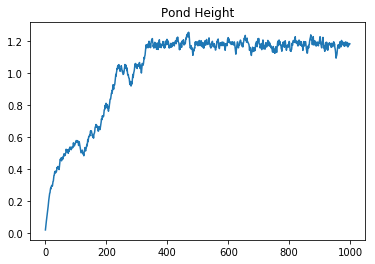

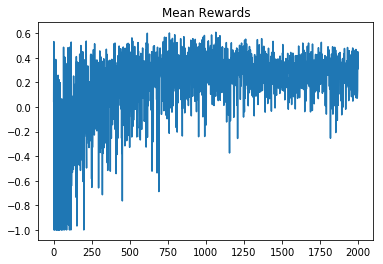

In [6]:
plt.figure(1)
plt.plot(h)
plt.title("Pond Height")
plt.savefig("pond_height.jpeg")

plt.figure(2)
plt.plot(re)
plt.title("Mean Rewards")
plt.savefig("mean_rewards.jpeg")